# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The type of the state is: ', type(states[0]))

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]
The type of the state is:  <class 'numpy.ndarray'>


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

### 4.a Understanding the data, data types and shapes

We have multiple agents here, each with their own state values. The state of one agent cannot be used by the other to take actions and so we need to keep the respective states separate. This will drive the design of the memory additions and sampling. To illustrate this, we compare the game of tennis with tic-tac-toe. In case of tennis, each agent is restricted to move in their respective space range. The neural network for the agent on the left learns different actions for the ball in the left tennis court vs the ball in the right tennis court. It would also act different depending on the direction of travel of the ball. As a result, the state observed by the agent on the right court, cannot be fed to the network of the agent on the left court. In Tic-Tac-Toe, the state is interchangeable and the two agents can hence, share the states from the memory. 

Below I have run some cells to understand the shape and type of the data used in the training of the agent.

In [7]:
import torch

In [8]:
# States
states

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -6.14030886, -1.5       , -0.        ,  0.        ,
        -7.11741829,  6.        , -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -7.9574213 , -1.5       ,  0.        ,  0.        ,
         7.11741829,  6.        ,  0.        ,  0.        ]])

In [9]:
# creating dummy state with negative value for agent1 and positive value for agent2
dum_state = np.array([np.ones(states[0].shape) * -1, np.ones(states[1].shape) * 1])

dum_state

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [10]:
# Creating the desired shape from memory sample function

dum_state2 = dum_state*2

dum_states_sample = torch.from_numpy(np.vstack([[dum_state], [dum_state2]]))
dum_states_sample

tensor([[[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
          -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
          -1., -1.],
         [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
           1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
           1.,  1.]],

        [[-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
          -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
          -2., -2.],
         [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
           2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
           2.,  2.]]], dtype=torch.float64)

In [11]:
# Another method
dum_states_sample2 = torch.from_numpy(np.array([dum_state, dum_state2]))
dum_states_sample2

tensor([[[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
          -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
          -1., -1.],
         [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
           1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
           1.,  1.]],

        [[-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
          -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
          -2., -2.],
         [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
           2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
           2.,  2.]]], dtype=torch.float64)

In [12]:
# Retrieving states for each agent for actor network

print(dum_states_sample.shape)

# dum_states_sample shape is (num_states, num_agents, state_size)

agent1_states_sample = dum_states_sample[:, 0,:]
print('Agent1 states sample: ', agent1_states_sample)

agent2_states_sample = dum_states_sample[:, 1,:]
print('Agent2 states sample: ', agent2_states_sample)

torch.Size([2, 2, 24])
Agent1 states sample:  tensor([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
         -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.]], dtype=torch.float64)
Agent2 states sample:  tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.]], dtype=torch.float64)


In [13]:
# Retrieving states for each agent for critic network
critic_states = dum_states_sample.reshape(dum_states_sample.shape[0], -1)
critic_states

tensor([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
         -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.]], dtype=torch.float64)

In [14]:
# Actions
actions

array([[ 0.11813384, -1.        ],
       [ 0.4610506 , -0.56836063]])

In [15]:
# Creating the desired shape from memory sample function

actions2 = actions * -1

dum_actions_sample = torch.from_numpy(np.vstack([[actions], [actions2]]))
dum_actions_sample

tensor([[[ 0.1181, -1.0000],
         [ 0.4611, -0.5684]],

        [[-0.1181,  1.0000],
         [-0.4611,  0.5684]]], dtype=torch.float64)

In [16]:
# Another method
dum_actions_sample2 = torch.from_numpy(np.array([actions, actions2]))
dum_actions_sample2

tensor([[[ 0.1181, -1.0000],
         [ 0.4611, -0.5684]],

        [[-0.1181,  1.0000],
         [-0.4611,  0.5684]]], dtype=torch.float64)

In [17]:
# Retrieving actions to feed the critic network
critic_actions = dum_actions_sample.reshape(dum_actions_sample.shape[0],-1)
critic_actions

tensor([[ 0.1181, -1.0000,  0.4611, -0.5684],
        [-0.1181,  1.0000, -0.4611,  0.5684]], dtype=torch.float64)

In [18]:
# Testing concatenate of states and actions inside the critic forward function
torch.cat((critic_states, critic_actions), dim=1)

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.1181,
         -1.0000,  0.4611, -0.5684],
        [-2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
         -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
         -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
         -2.0000, -2.0000, -2.0000,  2.0000,  2.0000,  2.0000,  2.0000,
          2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,
          2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,
          2.0000,  2.0000, 

In [19]:
# Rewards
rewards

[0.0, -0.009999999776482582]

In [20]:
# Creating desired shape
rewards_sample = torch.from_numpy(np.vstack([rewards, [1, 1]]))
rewards_sample

tensor([[ 0.0000, -0.0100],
        [ 1.0000,  1.0000]], dtype=torch.float64)

In [21]:
# Retrieving rewards for each agent
print('rewards for agent 0: ')
print(rewards_sample[:,0])

print('\nrewards for agent 1: ')
print(rewards_sample[:,1])

rewards for agent 0: 
tensor([ 0.,  1.], dtype=torch.float64)

rewards for agent 1: 
tensor([-0.0100,  1.0000], dtype=torch.float64)


In [22]:
rewards_sample[:1].reshape(rewards_sample.shape[0],1)

tensor(1.00000e-03 *
       [[ 0.0000],
        [-10.0000]], dtype=torch.float64)

In [23]:
# Dones
dones

[True, True]

In [24]:
# Creating desired shape
dones_sample = torch.from_numpy(np.vstack([dones, [False, True]]).astype(np.uint8))
dones_sample

tensor([[ 1,  1],
        [ 0,  1]], dtype=torch.uint8)

In [25]:
# Retrieving dones for each agent
print('dones for agent 0: ')
print(dones_sample[:,0])

print('\ndones for agent 1: ')
print(dones_sample[:,1])

dones for agent 0: 
tensor([ 1,  0], dtype=torch.uint8)

dones for agent 1: 
tensor([ 1,  1], dtype=torch.uint8)


### 4.b Train the Agent with MADDPG
The MADDPG algorithm is used to train the agent

In [26]:
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from workspace_utils import active_session   # keep session active

import time

In [27]:
#from maddpg_agent import MultiAgent
import maddpg_agent

In [81]:
import importlib
importlib.reload(maddpg_agent)

<module 'maddpg_agent' from '/home/workspace/maddpg_agent.py'>

In [28]:
# instantiate the Agents
agents = maddpg_agent.MultiAgent(state_size=state_size, action_size=action_size, num_multi_agents=num_agents, seed=2)

In [29]:
# Run the algorithm

def maddpg(n_episodes=5000, print_every=100, reset_time=100):
    """Multi_Agent Deep Deterministic Policy Gradient for N agents
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        print_every (int): number of episodes after which to print the score
        reset_time (int): the number of steps before the agents are reset
    """
    
    scores_deque = deque(maxlen=print_every)
    scores = []
    avg_scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        score = np.zeros(num_agents)
        agents.reset()
        
        t = 1
        
        while True:
            
            if t % reset_time == 0:
                agents.reset()
            t += 1
            
            actions = agents.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            agents.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            score += rewards
            
            if np.any(dones):
                break
                
        max_score = np.max(score)
        scores_deque.append(max_score)
        scores.append(max_score)
        average_score = np.mean(scores_deque)
        avg_scores.append(average_score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tLast Episode Score: {:.2f}'.format(i_episode, average_score, max_score), 
              end = "")
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tLast Episode Score: {:.2f}'.format(i_episode, average_score, max_score))
        
        if average_score >= 0.5:
            agents.save_model()
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, average_score))
            break
            
    return scores, avg_scores


        


In [30]:
start = time.time()

with active_session():
    scores, avg_scores = maddpg()
    
end = time.time()

Episode 100	Average Score: 0.00	Last Episode Score: 0.00
Episode 200	Average Score: 0.03	Last Episode Score: 0.00
Episode 300	Average Score: 0.07	Last Episode Score: 0.10
Episode 400	Average Score: 0.10	Last Episode Score: 0.00
Episode 500	Average Score: 0.14	Last Episode Score: 0.40
Episode 600	Average Score: 0.28	Last Episode Score: 0.50
Episode 700	Average Score: 0.41	Last Episode Score: 0.10
Episode 726	Average Score: 0.51	Last Episode Score: 1.40
Environment solved in 726 episodes!	Average Score: 0.51


In [31]:
print('Time taken: {:.0f} seconds'.format(end-start))

Time taken: 14864 seconds


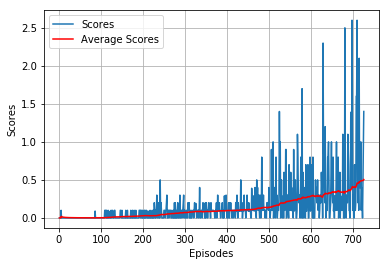

In [32]:
# Plot the scores

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label = 'Scores')
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores, c = 'r', label = 'Average Scores')
plt.ylabel('Scores')
plt.xlabel('Episodes')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

### 5. Watch a Smart Agent
We can run the trained agents now on the environment to see how it performs in testing mode

In [6]:
from maddpg_agent import MultiAgent

# instantiate the Agents
trained_agents = MultiAgent(state_size=state_size, action_size=action_size, num_multi_agents=num_agents, seed=2)

# Load the model's parameters of each agent
trained_agents.load_model()


In [13]:
test_scores = []

with active_session():
    for i_episode in range(1, 11):
        env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        score_i = np.zeros(num_agents)                          # initialize the score (for each agent)
        while True:
            actions = trained_agents.act(states, 
                                         add_noise=False)      # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            score_i += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break

        print('Episode: {}\tScore: {:.2f}'.format(i_episode, np.max(score_i)))
        test_scores.append(np.max(score_i))
print('Total average scores over 10 episodes: {:.2f}'.format(np.mean(test_scores)))

Episode: 1	Score: 2.60
Episode: 2	Score: 2.70
Episode: 3	Score: 2.60
Episode: 4	Score: 0.20
Episode: 5	Score: 2.60
Episode: 6	Score: 2.70
Episode: 7	Score: 2.60
Episode: 8	Score: 2.70
Episode: 9	Score: 2.70
Episode: 10	Score: 2.60
Total average scores over 10 episodes: 2.40


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

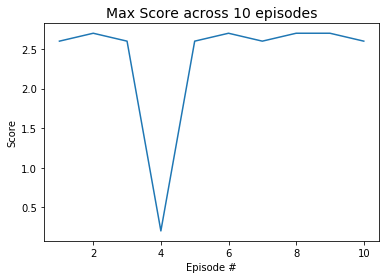

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(test_scores)+1), test_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Max Score across {} episodes'.format(len(test_scores)), size=14)
plt.show()

When finished, you can close the environment.

In [6]:
#env.close()